In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import Libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Check out the Data

In [45]:
df = pd.read_csv('/content/drive/MyDrive/Data mining & ML/USA_Housing.csv')

In [46]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [48]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [49]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


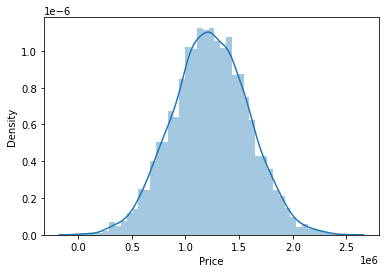

In [50]:
sns.distplot(df['Price'])

## Linear Regression Model

In [51]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = df['Price']

In [52]:
X

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [53]:
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

## Train Test Split


In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [56]:
X_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
2573,71090.646847,4.978978,6.230366,2.33,26030.463705
2066,79057.798917,7.634776,10.219902,3.43,27142.028199
2823,70072.521856,5.805508,8.479921,6.20,43181.824651
2389,52599.086663,6.641146,8.440430,3.03,31590.385335
2702,74380.942731,5.330604,7.642895,3.02,37315.788401
...,...,...,...,...,...
1180,72695.115137,5.363777,6.871980,4.24,48115.420780
3441,75479.767453,6.009215,6.475022,4.26,18537.430799
1344,70670.878894,6.581627,6.477495,3.17,23592.157588
4623,73804.908618,6.731999,7.617261,4.25,40877.189120


In [57]:
y_train

2573    8.473872e+05
2066    2.050594e+06
2823    1.594089e+06
2389    8.972234e+05
2702    1.245053e+06
            ...     
1180    1.394971e+06
3441    9.339491e+05
1344    1.237903e+06
4623    1.574212e+06
1289    9.176109e+05
Name: Price, Length: 3500, dtype: float64

In [58]:
X_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
245,77300.031444,5.260975,6.936548,4.49,29499.040953
4493,69956.751883,4.982102,7.860718,3.17,35148.164910
4583,62654.359483,5.674788,6.850386,4.24,36718.512313
2242,38868.250311,6.965104,8.966906,4.22,25432.076773
3407,66629.254556,7.593559,7.073691,4.48,37261.318278
...,...,...,...,...,...
2257,63780.997900,6.687163,7.769068,5.02,35056.448341
1146,65846.171039,6.385374,6.804131,3.18,28214.363551
134,67769.825591,8.074694,6.761631,4.22,33254.603409
997,58204.223086,6.301814,7.375616,5.41,46663.402745


In [59]:
y_test

245     1.118048e+06
4493    1.326947e+06
4583    1.053485e+06
2242    7.590447e+05
3407    1.381118e+06
            ...     
2257    1.168994e+06
1146    9.289500e+05
134     1.760735e+06
997     1.367641e+06
1555    8.560229e+05
Name: Price, Length: 1500, dtype: float64

## Creating and Training the Model

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
lm = LinearRegression()

In [62]:
lm.fit(X_train,y_train)

LinearRegression()

## Model Evaluation

In [63]:
lm.coef_

array([2.15985144e+01, 1.65641394e+05, 1.20514981e+05, 4.78556603e+02,
       1.53645374e+01])

In [64]:
X.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [65]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.598514
Avg. Area House Age,165641.393655
Avg. Area Number of Rooms,120514.980789
Avg. Area Number of Bedrooms,478.556603
Area Population,15.364537


In [66]:
lm.score(X_test,y_test)

0.9159275718398606

## Predictions from our Model

In [67]:
predictions = lm.predict(X_test)

In [68]:
predictions

array([1194183.19521018, 1186927.18355784, 1046823.39252689, ...,
       1490906.43004558, 1271225.19780343,  626608.43316325])

In [69]:
y_test

245     1.118048e+06
4493    1.326947e+06
4583    1.053485e+06
2242    7.590447e+05
3407    1.381118e+06
            ...     
2257    1.168994e+06
1146    9.289500e+05
134     1.760735e+06
997     1.367641e+06
1555    8.560229e+05
Name: Price, Length: 1500, dtype: float64

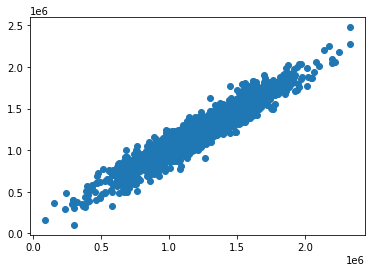

In [70]:
plt.scatter(y_test,predictions)

In [ ]:
sns.pairplot(X)